# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This data was collected from 17 campaigns 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [70]:
import pandas as pd
from datetime import datetime
import numpy as np
from time import process_time
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, TargetEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [40]:
df = pd.read_csv('/Users/sriram.rao/Documents/MyStuff/AI_ML/Module_17/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [42]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [43]:
df['job'].value_counts().sum()

41188

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Business Goal

The business goal of this algorithm design is to predict potential customers who would invest in high interest deposits offered by the bank based on features of customers who signed up for such deposits in the past (study)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [45]:
for col in ['job','marital','education','default','housing','loan']:
    print (col, df[col].isna().sum(), (df[col].value_counts()['unknown'] / df[col].value_counts().sum()))

job 0 0.008012042342429833
marital 0 0.0019423132951345051
education 0 0.042026803923472855
default 0 0.20872584247839177
housing 0 0.0240361270272895
loan 0 0.0240361270272895


## Engineering Features

1. **Nulls and Unknowns**: This data does not have nulls. Also, the not so categorical value of 'unknown' is present only in small percentages
2. **Target Encoding**: Columns job, marital and education have a number of possible values and using OneHotEncoding for them will result in explosion of dimensions which may become an issue with SVMs. For this reason, I will use Traget Encoder for these features.
3. **One Hot Encoding**: Features with yes/no like values are best One Hot Encoded. I will plan to use this encoding for default, housing, loan, contact and poutcome
4. **Date Time Fields**: I will convert month and day of the week into datetime fields so they can be treated as numeric
5. **Zero and One**: Finally the target feature y will be converted to 0 for no and 1 for yes

In [46]:
datestring = "12"
dt = datetime.strptime(datestring, '%m')

In [47]:
X = df

In [48]:
X['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [49]:
X['month_dt'] = pd.Series([str(x).replace("mar", "3")\
                       .replace("apr", "4")\
                       .replace("may", "5")\
                       .replace('jun','6')\
                       .replace('jul','7')\
                       .replace('aug','8')\
                       .replace('sep','9')\
                       .replace('oct','10')\
                       .replace('nov','11')\
                       .replace('dec','12')\
               for x in X['month']], X['month'].index)

In [50]:
X['weekday_dt'] = pd.Series([str(x).replace("thu", "4")\
                       .replace("mon", "1")\
                       .replace("wed", "3")\
                       .replace('tue','2')\
                       .replace('fri','5')\
               for x in X['day_of_week']], X['day_of_week'].index)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_dt,weekday_dt
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5,1


In [51]:
y = X['y'].map({'yes':1, 'no':0})
X = X.drop(['y', 'month', 'day_of_week'], axis=1)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Based on the documentation, the following 7 factors features were most influential on customers who accepted the deposit offer. 

The total percent impact of these top features comes close to **50%** based on the figure below. We will expect our models to have score greater than the total documented by these features.

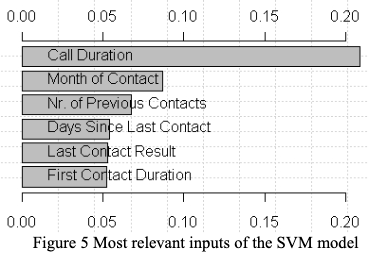

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [54]:
def simple_model_score(model):
    coltrans = make_column_transformer((StandardScaler(), make_column_selector(dtype_include=np.number)),
        (TargetEncoder(), ['job', 'education', 'marital']), 
             (OneHotEncoder(), ['default', 'housing', 'loan', 'contact', 'poutcome']),
                                   remainder='passthrough')
#                                  (OneHotEncoder(), ['default', 'housing', 'loan', 'contact', 'poutcome']))

    pipe = Pipeline([['col_trans', coltrans], 
                ['model', model]])
    
    start_time = process_time()
    pipe.fit(X_train, y_train)
    stop_time = process_time()

    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    preds = pipe.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)

    return ((stop_time - start_time),train_score, test_score, precision, recall, roc)



### Problem 9: Score the Model

What is the accuracy of your model?

In [55]:
_, _, test_score, prec, rec, roc = simple_model_score(LogisticRegression(max_iter=500))

print(f'The test accuracy of the LogisticRegression modle is {test_score, prec, rec, roc}')

The test accuracy of the LogisticRegression modle is (0.9106535884238127, 0.6638537271448663, 0.409366869037294, 0.6916147556035114)


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [56]:
model_stats = pd.DataFrame(columns=['Model','Train Time','Train Accuracy','Test Accuracy', 'Precision', 
                                    'Recall', 'ROC'])

In [57]:
# Utility function to record model stats

def record_model_score(model_name, model): 
    time, train, test, prec, rec, roc = simple_model_score(model)
    model_stats.loc[len(model_stats)] = {'Model':model_name, 
                                 'Train Time':round(time,5), 
                                 'Train Accuracy':round(train,5), 
                                 'Test Accuracy':round(test,5),
                                 'Precision':round(prec,5),
                                 'Recall':round(rec,5),
                                 'ROC':round(roc,5)}
    

In [58]:
# LogisticRegression
record_model_score("Logistic Regression", LogisticRegression(max_iter=500))

# KNN
record_model_score("KNN", KNeighborsClassifier())

# Decision Tree
record_model_score("Decision Tree", DecisionTreeClassifier())

# SVM
record_model_score("SVM", SVC())

In [59]:
model_stats = model_stats.set_index('Model')
model_stats

,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
Model,,,,,,
Logistic Regression,11.52696,0.90984,0.91065,0.66385,0.40937,0.69161
KNN,0.93399,0.92998,0.90220,0.57833,0.46748,0.71225
Decision Tree,1.22152,0.97002,0.88744,0.49753,0.52385,0.72857
SVM,4.62112,0.90758,0.90687,0.67138,0.32958,0.65462


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# More Feature Engineering

Since categorical features are the most expensive (as they need to be transformed) and also are easy to analyze with fixed set of values, I will pick them up for scrutiny. 

The approach I will take is similar to what the CRISP-DM that arrived at this data set did - analyze the data for even splits between categories with the goal of eliminating them as removal of such balanced features should not impact our results.

From the analysis below 'housing' is evenly split between 'yes' and 'no' (and 'unknown' is negligible) and hence will be a good feature to eliminate from the study.

We will leave the other categorical and numerical features as is.

In [60]:
for col in ['job','marital','education','default','housing','loan']:
    print (f'{col}:')
    print ((df[col].value_counts() / df[col].value_counts().sum()))

job:
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64
marital:
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64
education:
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64
default:
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
housing:
yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64
loan:
no         0.824269
yes        

In [61]:
# drop the housing feature
X_train = X_train.drop('housing', axis=1)
X_test = X_test.drop('housing', axis=1)

# Hyperparameter tuning and grid search

In [62]:
# Generic hyperparameter search function
def search_model_score(model, params):
    
    coltrans = make_column_transformer((StandardScaler(), make_column_selector(dtype_include=np.number)),
        (TargetEncoder(), ['job', 'education', 'marital']), 
             (OneHotEncoder(), ['default', 'loan', 'contact', 'poutcome']),
                                   remainder='passthrough')

    search = GridSearchCV(model, params)
    pipe = Pipeline([['col_trans', coltrans], 
                ['model', search]])
    pipe.fit(X_train, y_train)
    
    search = pipe.named_steps['model']
    train_time = np.mean(search.cv_results_['mean_fit_time'])
    
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    preds = pipe.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
    
    return (train_time,train_score, test_score, precision, recall, roc)

search_stats = pd.DataFrame(columns=['Model','Train Time','Train Accuracy','Test Accuracy',
                                        'Precision', 'Recall', 'ROC'])

def record_search_score(model_name, model, params): 
    time, train, test, prec, rec, roc = search_model_score(model, params)
    search_stats.loc[len(search_stats)] = {'Model':model_name, 
                                 'Train Time':round(time,5), 
                                 'Train Accuracy':round(train,5), 
                                 'Test Accuracy':round(test,5),
                                 'Precision':round(prec, 5),
                                 'Recall':round(rec,5),
                                 'ROC':round(roc,5)}

In [63]:
# LogisticRegression
params = {'random_state':[42],
         'max_iter':np.array(range(500, 1000, 100))}
record_search_score('LogisticRegression', LogisticRegression(), params)

search_stats

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
0,LogisticRegression,0.63329,0.90984,0.91075,0.66479,0.40937,0.69167


In [64]:
# KNN
params = {'n_neighbors':np.array(range(1, 21, 2))}
record_search_score('KNN', KNeighborsClassifier(), params)

search_stats

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
0,LogisticRegression,0.63329,0.90984,0.91075,0.66479,0.40937,0.69167
1,KNN,0.01579,0.91522,0.90900,0.63636,0.43712,0.70281


In [65]:
# Decision Tree
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'min_samples_split': [0.05, 0.1, 0.15, 0.2],
          'criterion': ['gini','entropy','log_loss'],
          'min_samples_leaf': [0.05, 0.1, 0.15, 0.2]
         }
record_search_score('Decision Tree', DecisionTreeClassifier(), params)

search_stats

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
0,LogisticRegression,0.63329,0.90984,0.91075,0.66479,0.40937,0.69167
1,KNN,0.01579,0.91522,0.90900,0.63636,0.43712,0.70281
2,Decision Tree,0.03739,0.90463,0.90405,0.61702,0.37728,0.67387


In [66]:
# SVM

#params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
#         'gamma': [0.1, 1.0, 10.0, 100.0]}

params = {'kernel':['rbf', 'poly', 'sigmoid']}
record_search_score('SVM', SVC(), params)

search_stats

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
0,LogisticRegression,0.63329,0.90984,0.91075,0.66479,0.40937,0.69167
1,KNN,0.01579,0.91522,0.90900,0.63636,0.43712,0.70281
2,Decision Tree,0.03739,0.90463,0.90405,0.61702,0.37728,0.67387
3,SVM,2.94164,0.90748,0.90716,0.67558,0.32871,0.65440


In [91]:
search_stats = search_stats.set_index('Model')

In [104]:
def visualize_perf(df):
    
    # Scores
    fig = px.bar(df, x= df.index, 
        y=['Train Accuracy','Test Accuracy','Precision','Recall','ROC'],
        barmode='group', title="Model Performance Metrics")

    fig.update_layout(
        legend_title="Scores"
    )
    fig.show()
    
    # Training Times
    fig = px.bar(df, x=df.index, y='Train Time', title="Model Training Time", color=df.index)
    fig.update_layout(xaxis={'categoryorder':'total ascending'})
    fig.show()

# Default Model Performance

Here is the performance of the models with default values (not using grid search) 

In [105]:
model_stats

,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
Model,,,,,,
Logistic Regression,11.52696,0.90984,0.91065,0.66385,0.40937,0.69161
KNN,0.93399,0.92998,0.90220,0.57833,0.46748,0.71225
Decision Tree,1.22152,0.97002,0.88744,0.49753,0.52385,0.72857
SVM,4.62112,0.90758,0.90687,0.67138,0.32958,0.65462


In [106]:
visualize_perf(model_stats)

# Model Performance with Grid Search

Below is the performance of each of the models after search for optimal hyper parameters

In [107]:
search_stats

,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,ROC
Model,,,,,,
LogisticRegression,0.63329,0.90984,0.91075,0.66479,0.40937,0.69167
KNN,0.01579,0.91522,0.90900,0.63636,0.43712,0.70281
Decision Tree,0.03739,0.90463,0.90405,0.61702,0.37728,0.67387
SVM,2.94164,0.90748,0.90716,0.67558,0.32871,0.65440


In [108]:
visualize_perf(search_stats)

# Conclusion

Interestingly the performance metrics of models with default parameters came out better than hperparameter optimization with Grid search. 

The training times of the default models were noticeably higher than that of grid search (with the caveat that performance of default models was measured using process time while we used results from the pipe for grid search).

Overall **KNN** had the best score-speed performance against this banking dataset in both the runs. No wonder KNN is the model used in implementing Vector Search - a technology used in the search industry to fetch similar results by querying data.

##### Questions